# Telecom Customer Churn

For this module examination, I would use data from Kaggle regarding Customer Churn Rate.

Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

<b> Coloumns Descriptions  </b>
- customerID = Customer ID
- gender = Whether the customer is a male or a female
- SeniorCitizen = Whether the customer is a senior citizen or not (1, 0)
- Partner = Whether the customer has a partner or not (Yes, No)
- Dependents = Whether the customer has dependents or not (Yes, No)
- tenure = Number of months the customer has stayed with the company
- PhoneService = Whether the customer has a phone service or not (Yes, No)
- MultipleLines = Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService = Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity = Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup = Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection = Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport = Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV = Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies = Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract = The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling = Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod = The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges = The amount charged to the customer monthly
- TotalCharges = The total amount charged to the customer
- Churn = Whether the customer churned or not (Yes or No)

In this exam, the maximum point is 100 with the criterion is shown below:
- The Coding Part would yield the maximum point of 30
- 4 Question with score of:
    - Q1 : 5 Point
    - Q2 : 5 Point
    - Q3 : 10 Point
    - Q4 : 5 Point
    - Q5 : 45 Point

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_cust = pd.read_csv('Churn_ujian.xls')

In [5]:
df_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [7]:
df_cust.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [26]:
df_describe = df_cust.describe(include='all').transpose()

In [30]:
df_describe.drop(['MonthlyCharges','tenure'],axis=0,inplace=True)

In [31]:
df_describe.head(1)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,6061-PQHMK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df_describe.drop(['mean','std','min','25%','50%','75%','max'],axis=1,inplace=True)

In [33]:
df_describe

,count,unique,top,freq
customerID,7043,7043,6061-PQHMK,1
gender,7043,2,Male,3555
SeniorCitizen,7043,NaN,NaN,NaN
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088


In [34]:
df_feat = pd.DataFrame(columns = ['dataFeatures','dataType','null','nullPct','unique','uniqueSample'])

In [36]:
df_feat['dataFeatures'] = df_cust.columns.tolist()

In [38]:
tmp1 = []
tmp2 = []
tmp3 = []
tmp4 = []
tmp5 = []
for i in df_feat['dataFeatures']:
    tmp1.append(str(df_cust[i].dtypes))
    tmp2.append(df_cust[i].isna().sum())
    tmp3.append(df_cust[i].isna().sum()/df_cust[i].value_counts().sum())
    tmp4.append(df_cust[i].nunique())
    tmp5.append(df_cust[i].sample(2).get_values())

df_feat['dataType'] = tmp1
df_feat['null'] = tmp2
df_feat['nullPct'] = tmp3
df_feat['unique'] = tmp4
df_feat['uniqueSample'] = tmp5

In [39]:
df_feat

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,customerID,object,0,0.0,7043,"[8631-WUXGY, 5298-GSTLM]"
1,gender,object,0,0.0,2,"[Male, Female]"
2,SeniorCitizen,int64,0,0.0,2,"[0, 0]"
3,Partner,object,0,0.0,2,"[No, Yes]"
4,Dependents,object,0,0.0,2,"[No, No]"
5,tenure,int64,0,0.0,73,"[24, 47]"
6,PhoneService,object,0,0.0,2,"[Yes, Yes]"
7,MultipleLines,object,0,0.0,3,"[Yes, Yes]"
8,InternetService,object,0,0.0,3,"[DSL, Fiber optic]"
9,OnlineSecurity,object,0,0.0,3,"[No, No]"


We have no missing value, but as we can see the column TotalCharges have an object data type but when we sampled it they had some numerical value. Let's try to convert this column data type to float

It seems there is some string data that could not be converted to float, Let's try to find the row that is problematic

In [44]:
df_cust[df_cust['TotalCharges'].str.contains(' ', na=False)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


There are 11 datas with string space character at the TotalCharges Column

## Question 1
In your opinion, Why this datas filled with empty String? Is it related with another column?

Because there are some error occurrence on the system or human error

Try to replace this string value with 0 and convert the Total Charges to the float data type now

In [46]:
df_cust['TotalCharges'].replace(to_replace=[' '],value='0',inplace=True)

In [53]:
df_cust[df_cust['TotalCharges'] == '0'].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,No


In [54]:
df_cust['TotalCharges'] = df_cust['TotalCharges'].astype(float)

Check once more the data row that was previously have string value to make sure the data have been replaced by 0

In [56]:
df_cust[df_cust['TotalCharges'] == 0].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No


In [57]:
df_cust.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


I find it interesting that some people still pay their bill via mailed check, lets try to filter the dataset to only get the data with Mailed check class from the PaymentMethod feature

In [76]:
df_mailed = df_cust[df_cust['PaymentMethod'] == 'Mailed check']
df_mailed.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No


I am kinda curious, is there any difference between people who have partner or not for people who choose mailed check. Let's try to visualize this by using the countplot. I would also like to create a grid with the Payment Method as the columns to see the difference between each payment method.

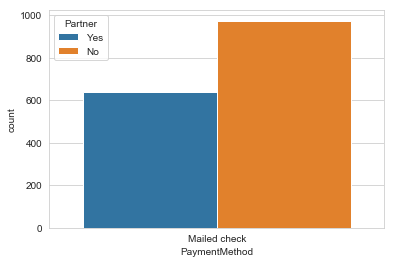

In [87]:
sns.countplot(df_mailed['PaymentMethod'], hue=df_cust['Partner'])

<Figure size 720x216 with 0 Axes>

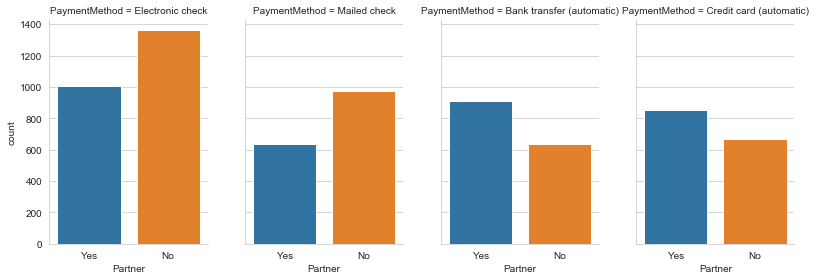

In [104]:
plt.figure(figsize=(10,3))
g = sns.catplot(x="Partner", col='PaymentMethod', data=df_cust, kind="count", height=4, aspect=.7)

Seems there is interesting finding that people who paid via Mailed Check are less likely to have partner compared to the other payment method. Let's try to use another feature to find any interesting finding, this time I would use the tenure feature with distribution plot. Just like before, I would create grid with different payment method as the columns.

In [93]:
df_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [309]:
df_cust['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

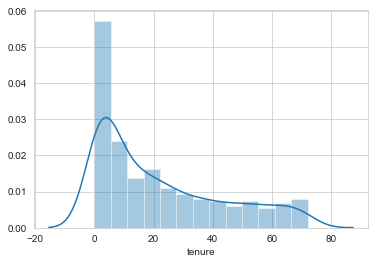

In [94]:
sns.distplot(df_mailed['tenure'])

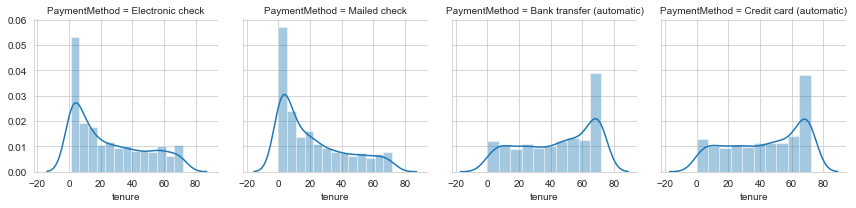

In [100]:
g = sns.FacetGrid(df_cust, col='PaymentMethod', palette="Set1")
g = (g.map(sns.distplot, 'tenure', hist=True, rug=False))

## Question 2

From the plot above, what could you conclude about people who paid via mailed check? (Just try to answer by looking at the plot above). Why do you think these pattern happen?

People who paid via mailed check, mostly have tenure between 0 and 20.

That is enough EDA between feature, now let's focus to the our target (Churn). First, try to visualize the count of the Churn feature

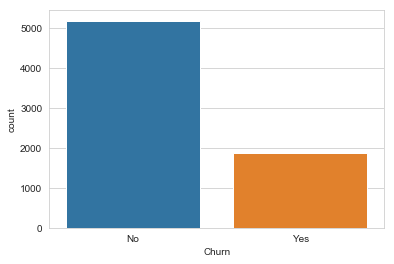

In [105]:
sns.countplot(df_cust['Churn'])

It seems we have a case of imbalanced dataset for churn prediction. Let's try to visualize the distirbution for every category and numerical columns that we have. Before we proceed, replace the SeniorCitizen feature value with 0 as No and 1 as Yes.

*Note: if you use looping for showing all the plot, don't forget to add plt.show() after each iteration*

In [112]:
SC = []
for i in df_cust['SeniorCitizen']:
    if i == 0:
        SC.append('No')
    else :
        SC.append('Yes')

In [123]:
df_cust['SeniorCitizen'].value_counts()

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

In [122]:
df_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [311]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [145]:
list_non_num = df_cust.drop(['customerID','Churn','TotalCharges','MonthlyCharges','tenure'],axis=1).columns.to_list()

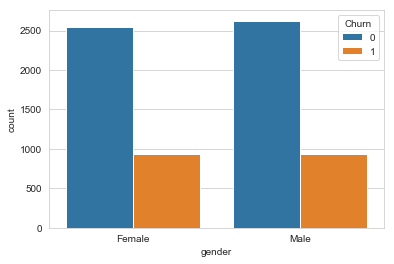

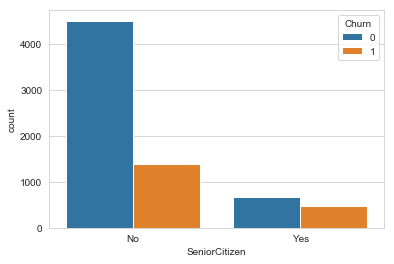

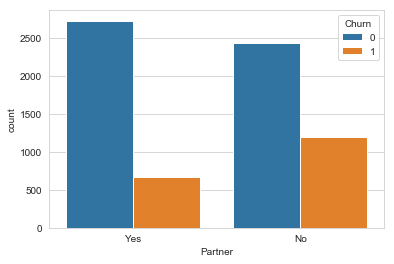

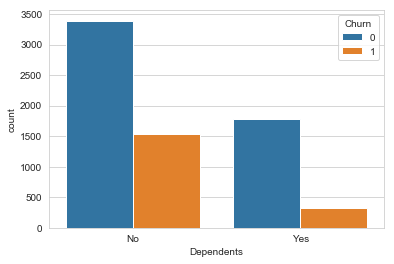

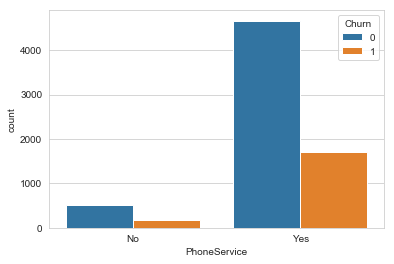

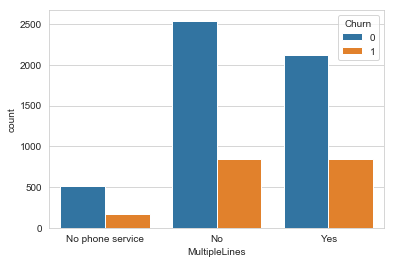

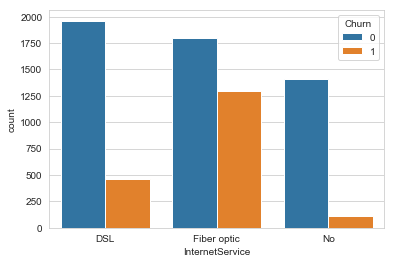

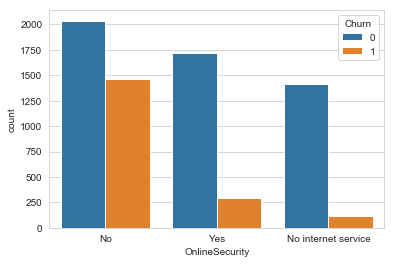

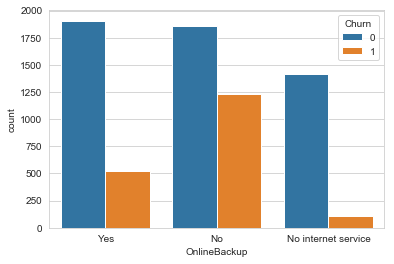

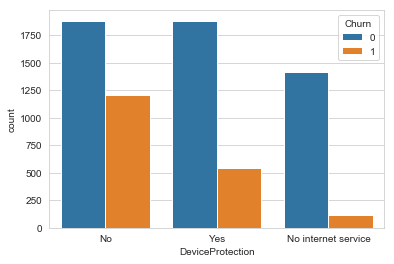

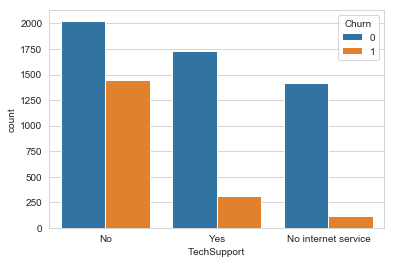

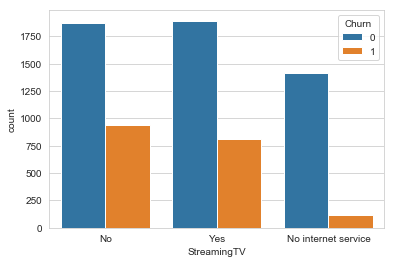

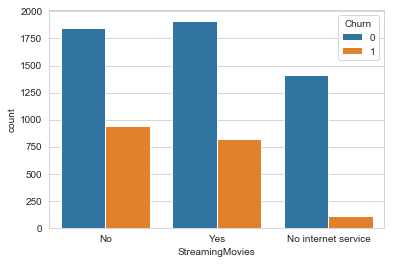

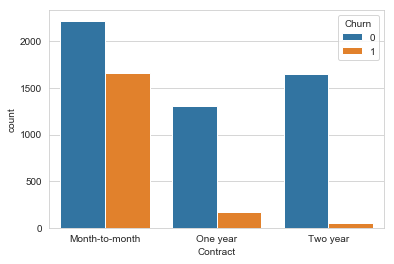

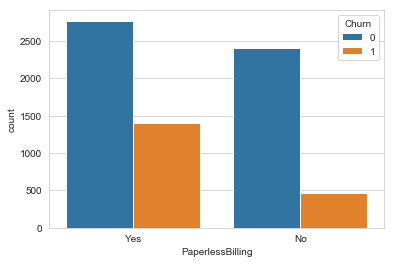

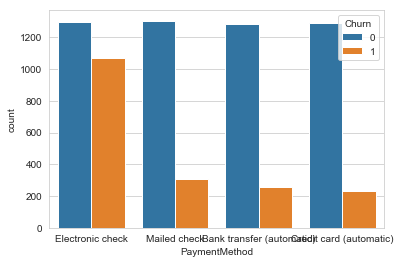

In [310]:
for i in list_non_num:
    sns.countplot(df_cust[i], hue='Churn', data = df_cust)
    plt.show()

In [144]:
numeric_columns = df_cust.select_dtypes(exclude='O').columns

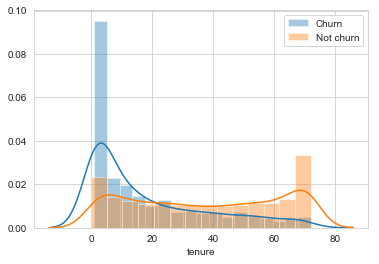

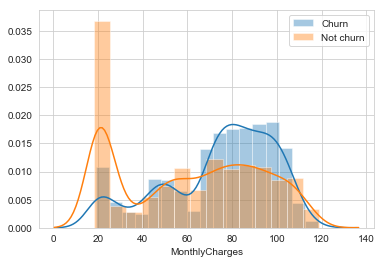

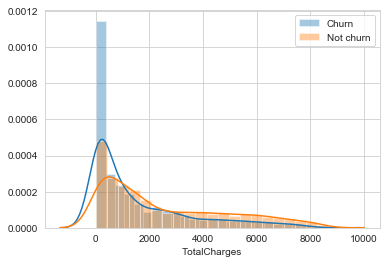

In [170]:
for j in numeric_columns:
    dfplot = df_cust[df_cust['Churn'] == 'Yes']
    sns.distplot(dfplot[j],  kde=True, label='Churn')
    dfplot = df_cust[df_cust['Churn'] == 'No']
    sns.distplot(dfplot[j],  kde=True,label='Not churn')
    plt.legend()
    plt.show()

## Question 3

Is there any interesting insight that you could find from the plot above?

Answer: Yes, most customers who churned mostly having low Total Charges and tenures. On the other hand, customers who is having high Monthly Charges are churned.

As our aim is to use machine learning for prediction, lets prepare our columns to be ready for machine learning activities. First, drop the CustomerID column then change all the category columns into numerical value by using get_dummies (OneHotEncoder) except the target column (Churn). Also, set the drop_first parameter as True.

At the same time, change the Churn feature value with No as 0 and Yes as 1

In [172]:
Churn = []
for k in df_cust['Churn']:
    if k == 'No':
        Churn.append(0)
    else:
        Churn.append(1)

In [174]:
df_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [178]:
df_cust['Churn'] = Churn

In [180]:
df_cust.drop('customerID',axis=1,inplace=True)

## ====> Target is here! <====

In [194]:
df_cust['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [183]:
df_cust_new = pd.get_dummies(df_cust.drop('Churn',axis=1),drop_first=True)

In [185]:
df_cust_new.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [186]:
df_cust_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
tenure                                   7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7043 non-null float64
gender_Male                              7043 non-null uint8
SeniorCitizen_Yes                        7043 non-null uint8
Partner_Yes                              7043 non-null uint8
Dependents_Yes                           7043 non-null uint8
PhoneService_Yes                         7043 non-null uint8
MultipleLines_No phone service           7043 non-null uint8
MultipleLines_Yes                        7043 non-null uint8
InternetService_Fiber optic              7043 non-null uint8
InternetService_No                       7043 non-null uint8
OnlineSecurity_No internet service       7043 non-null uint8
OnlineSecurity_Yes                       7043 non-null uint8
OnlineBackup_No internet service   

## Unsurpervised Modelling

Before we do any of the supervised modelling, let's do some data mining from our data. Remember, as lot of unsupervised model based on distance means that we need to rescale our data to have a same scale. 

In our case, we would use all the data except the target data for data mining. 

First, use the boxplot to check all the data distribution

In [189]:
cust_scaler = df_cust_new.copy()

In [188]:
from sklearn.preprocessing import StandardScaler

In [191]:
scaler = StandardScaler()

In [196]:
scaler.fit(cust_scaler)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [198]:
scaled_data=scaler.transform(cust_scaler)

In [199]:
df_scaled = pd.DataFrame(scaled_data, columns = cust_scaler.columns)

In [200]:
df_scaled.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.277445,-1.160323,-0.992611,-1.009559,-0.439916,1.034530,-0.654012,-3.054010,3.054010,-0.854176,-0.885660,-0.525927,-0.525927,-0.633933,-0.525927,1.378241,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807
1,0.066327,-0.259629,-0.172165,0.990532,-0.439916,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,1.381277,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,1.835513
2,-1.236724,-0.362660,-0.958066,0.990532,-0.439916,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,1.378241,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513
3,0.514251,-0.746535,-0.193672,0.990532,-0.439916,-0.966622,-0.654012,-3.054010,3.054010,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,1.381277,-0.525927,1.563872,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,-0.544807
4,-1.236724,0.197365,-0.938874,-1.009559,-0.439916,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,1.129102,-0.525927,-0.525927,-0.633933,-0.525927,-0.725563,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807


In [205]:
cust_scaler.columns.to_list()

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Male',
 'SeniorCitizen_Yes',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [227]:
sns.set_style('whitegrid')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

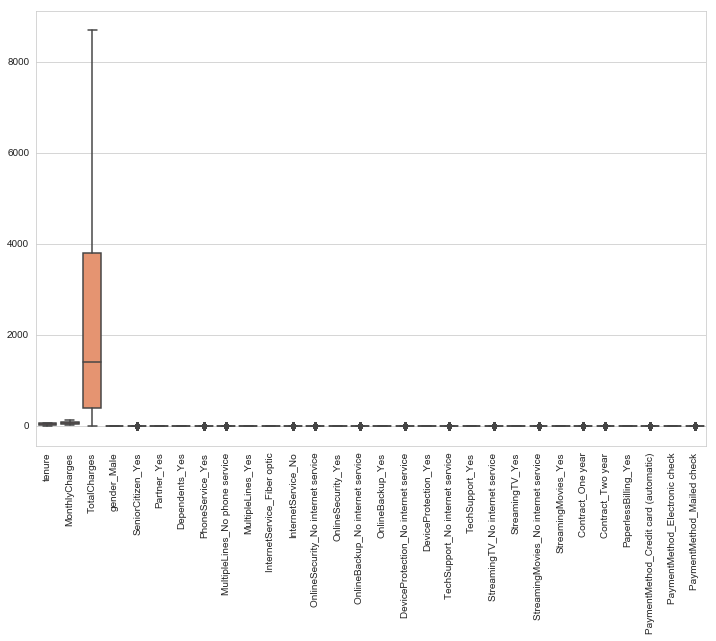

In [234]:
plt.figure(figsize=(12,8))
c = sns.boxplot(data=cust_scaler)
plt.xticks(rotation=90)

Just from the boxplot, we could see that the scale is not similar. In this case, lets rescale all the data by using the StandardScaler then check the data one more time to know our data distribution

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

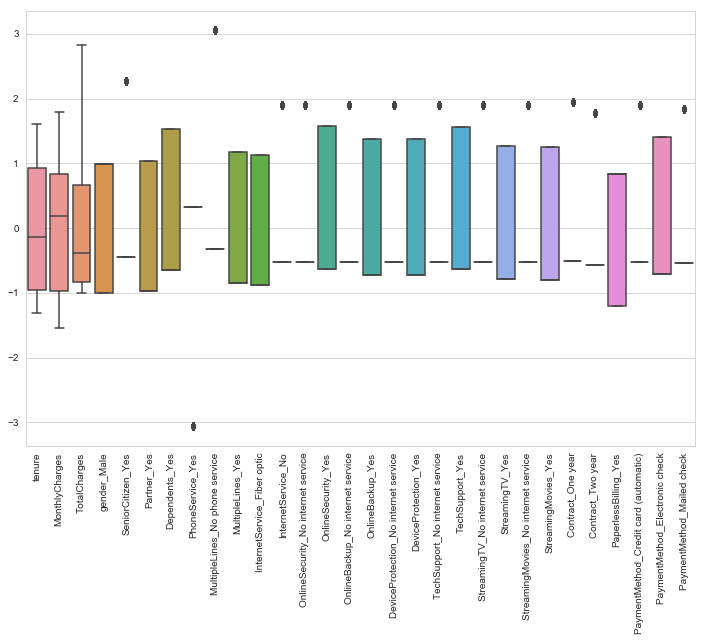

In [233]:
plt.figure(figsize=(12,8))
d = sns.boxplot(data=df_scaled)
plt.xticks(rotation=90)

In [235]:
df_scaled.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.277445,-1.160323,-0.992611,-1.009559,-0.439916,1.034530,-0.654012,-3.054010,3.054010,-0.854176,-0.885660,-0.525927,-0.525927,-0.633933,-0.525927,1.378241,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807
1,0.066327,-0.259629,-0.172165,0.990532,-0.439916,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,1.381277,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,1.835513
2,-1.236724,-0.362660,-0.958066,0.990532,-0.439916,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,1.378241,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513
3,0.514251,-0.746535,-0.193672,0.990532,-0.439916,-0.966622,-0.654012,-3.054010,3.054010,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,1.381277,-0.525927,1.563872,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,-0.544807
4,-1.236724,0.197365,-0.938874,-1.009559,-0.439916,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,1.129102,-0.525927,-0.525927,-0.633933,-0.525927,-0.725563,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807


We have lot of feature to be put into our unsupervised model, because of that let's use PCA to reduce our feature to 2 feature with random_state = 101. PC1 and PC2. 

In [236]:
from sklearn.decomposition import PCA

In [237]:
pca = PCA(n_components=2, random_state=101)

In [238]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=101,
    svd_solver='auto', tol=0.0, whiten=False)

In [240]:
x_pca = pca.transform(scaled_data)

In [241]:
x_pca.shape

(7043, 2)

In [242]:
df_pca = pd.DataFrame(x_pca,columns = ['PC 1','PC 2'])

In [244]:
df_pca

,PC 1,PC 2
0,-0.432402,-3.150994
1,-0.204024,-0.794405
2,-0.160382,-2.089736
3,-0.898671,-0.878803
4,-0.613839,-3.175062
5,-2.255701,-1.508454
6,-1.643893,-0.146918
7,0.381618,-2.985229
8,-2.879825,0.178266
9,-0.620112,0.450332


array([0.33179753, 0.11983851])

Our 2 PC only explained around 45 variance of the data, but we could just work with this data right now. Let's use the scatter plot to see the distribution of the 2 PC with the Churn feature as the hue

In [252]:
df_plot = df_pca.copy()

In [256]:
df_plot['Churn'] = df_cust['Churn']

In [302]:
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
PC 1     7043 non-null float64
PC 2     7043 non-null float64
Churn    7043 non-null category
dtypes: category(1), float64(2)
memory usage: 117.1 KB


In [315]:
df_plot['Churn'] = df_plot['Churn'].astype('category')

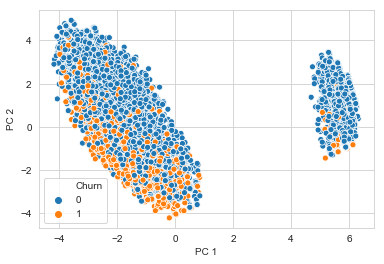

In [316]:
sns.scatterplot(x='PC 1', y='PC 2', hue='Churn', data= df_plot)

Seems our 2 PC resulting in the 2 different group, it is really interesting as it is not usable for separating our Churn feature but it might end up with another fascinating observation. 

Now, we would use KMeans, DBSCAN, and HDBSCAN to cluster our 2 PC. This time, I already done some analysis and find the best parameter we could use. Try to use the KMeans model with n_cluster = 2, DBSCAN model with eps = 0.4 and min_samples = 2, and HDBSCAN model with min_cluster_size =2 and min_samples = 25

Then create the scatter plot to compare the separation performance of each model. 

In [288]:
from sklearn.cluster import KMeans

In [349]:
kmeans = KMeans(n_clusters=2)

In [350]:
kmeans.fit(df_pca[['PC 1','PC 2']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [351]:
kmeans.cluster_centers_

array([[-1.58262771, -0.22198568],
       [ 5.7217281 ,  0.80255241]])

In [352]:
dfKmeans = df_pca.copy()
dfKmeans['Category'] = kmeans.labels_
dfKmeans.head()

,PC 1,PC 2,Category
0,-0.432402,-3.150994,0
1,-0.204024,-0.794405,0
2,-0.160382,-2.089736,0
3,-0.898671,-0.878803,0
4,-0.613839,-3.175062,0


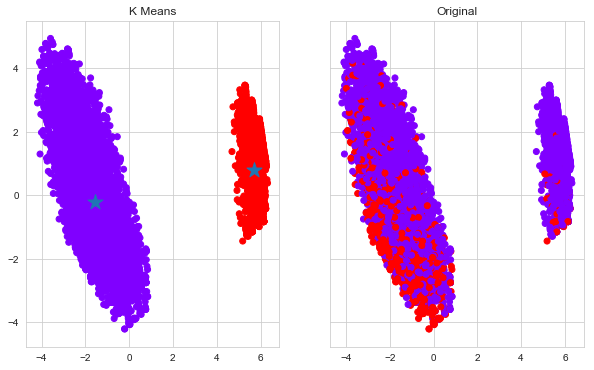

In [353]:
centroids = kmeans.cluster_centers_
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(dfKmeans['PC 1'], dfKmeans['PC 2'] ,c = dfKmeans['Category'] ,cmap='rainbow')
ax1.scatter(centroids[:,0], centroids[:,1], marker= '*', cmap='b', s=250)
            
ax2.set_title("Original")
ax2.scatter(df_plot['PC 1'], df_plot['PC 2'], c=df_plot['Churn'],cmap='rainbow')

In [325]:
from sklearn.cluster import DBSCAN

In [328]:
dbscan = DBSCAN(eps=0.4, min_samples= 2).fit(df_pca[['PC 1','PC 2']])

In [329]:
dfDBSCAN = df_pca.copy()

In [336]:
dfDBSCAN['Category'] = dbscan.labels_

In [330]:
from hdbscan import HDBSCAN

In [331]:
hdbscan = HDBSCAN(min_cluster_size=2, min_samples=25, gen_min_span_tree=True)

In [332]:
hdbscan.fit(df_pca[['PC 1','PC 2']])

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_method='eom',
        core_dist_n_jobs=4, gen_min_span_tree=True, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=2, min_samples=25, p=None,
        prediction_data=False)

In [334]:
dfHDBSCAN = df_pca.copy()

In [335]:
dfHDBSCAN['Category'] = hdbscan.labels_

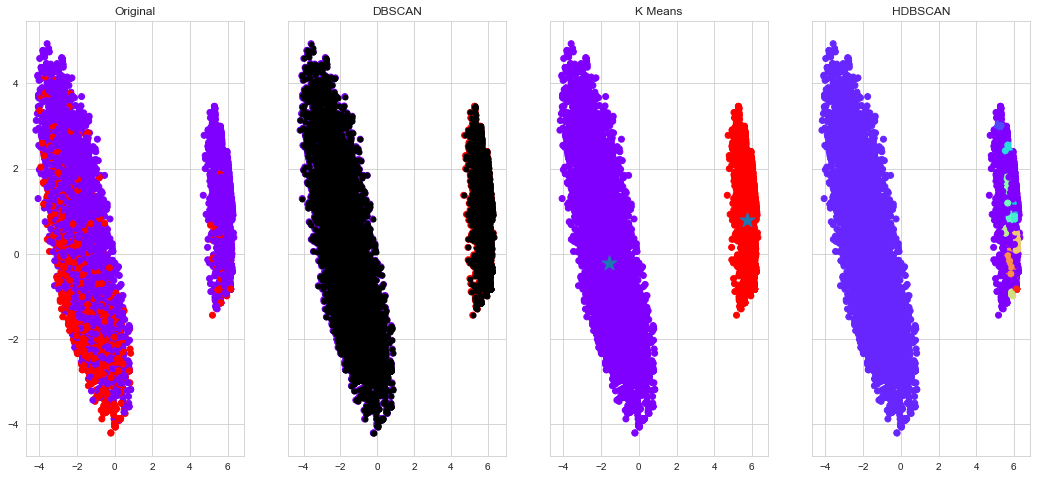

In [357]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey = True, figsize = (18,8))

ax1.set_title('Original')
ax1.scatter(df_plot['PC 1'], df_plot['PC 2'], c=df_plot['Churn'],cmap='rainbow')

core = dbscan.components_
ax2.set_title('DBSCAN')
ax2.scatter(dfDBSCAN['PC 1'], dfDBSCAN['PC 2'], c = dfDBSCAN['Category'], cmap = 'rainbow')
ax2.scatter(core[:,0], core[:,1], marker = 'o', c = 'black', s = 25)

ax3.set_title('K Means')
ax3.scatter(dfKmeans['PC 1'], dfKmeans['PC 2'] ,c = dfKmeans['Category'] ,cmap='rainbow')
ax3.scatter(centroids[:,0], centroids[:,1], marker= '*', cmap='b', s=250)

ax4.set_title('HDBSCAN')
ax4.scatter(dfHDBSCAN['PC 1'], dfHDBSCAN['PC 2'], c=dfHDBSCAN['Category'] ,cmap='rainbow')



Seems all of our our model resulting in 2 different cluster, just like we expected. Now, return the label from the KMeans model back to the original data (the data that we first read the csv are) and use the pair plot to see the relation between the numerical value with the label as the hue (I am personally name it k-label)

In [343]:
df_cust.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [344]:
df_klabel = df_cust[['tenure','MonthlyCharges','TotalCharges','Churn']]

In [354]:
df_klabel['k-label'] = kmeans.labels_

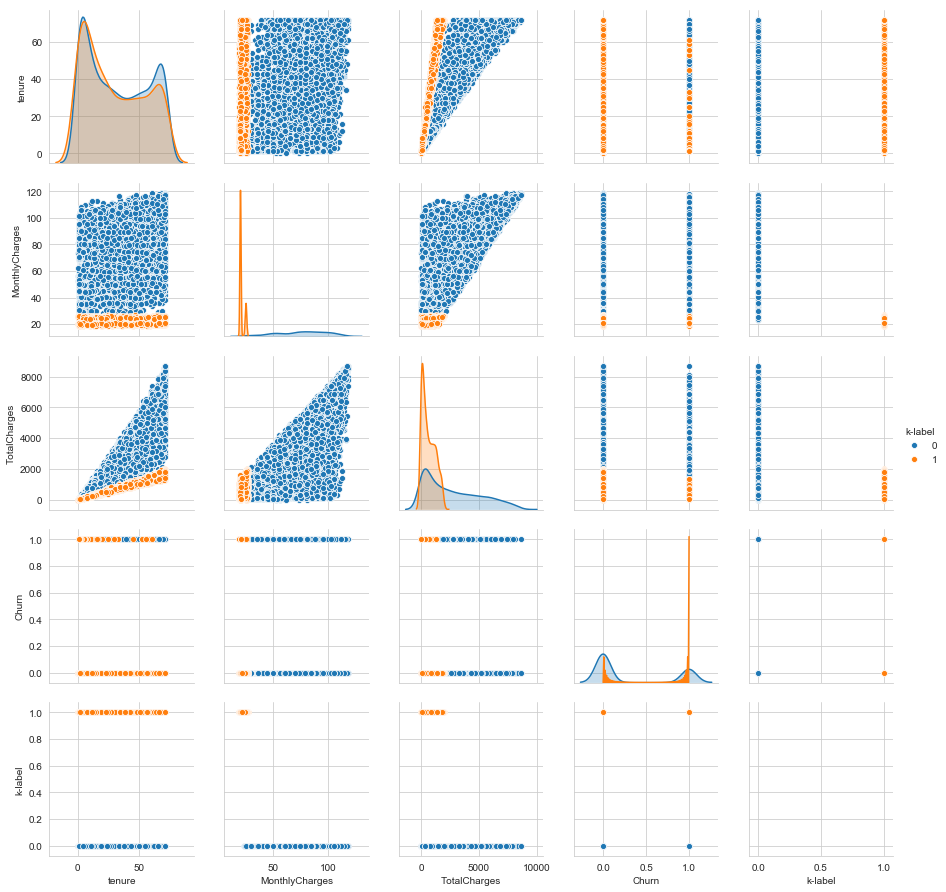

In [355]:
sns.pairplot(df_klabel, hue='k-label')

## Question 4
Just strictly from the plot above, What kind of insight you could find there?

There are imbalance amount of data between 0 and 1. So we need to oversampling the data.

### Supervised Modelling

First, done the Train Test Split by using random_state=101 and test size =0.2

In [358]:
from sklearn.model_selection import train_test_split

In [359]:
df_cust.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [363]:
y = df_cust['Churn']
X = df_cust_new

In [364]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

Normal X_train

In [365]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 240 to 4959
Data columns (total 30 columns):
tenure                                   5634 non-null int64
MonthlyCharges                           5634 non-null float64
TotalCharges                             5634 non-null float64
gender_Male                              5634 non-null uint8
SeniorCitizen_Yes                        5634 non-null uint8
Partner_Yes                              5634 non-null uint8
Dependents_Yes                           5634 non-null uint8
PhoneService_Yes                         5634 non-null uint8
MultipleLines_No phone service           5634 non-null uint8
MultipleLines_Yes                        5634 non-null uint8
InternetService_Fiber optic              5634 non-null uint8
InternetService_No                       5634 non-null uint8
OnlineSecurity_No internet service       5634 non-null uint8
OnlineSecurity_Yes                       5634 non-null uint8
OnlineBackup_No internet service 

In [367]:
from imblearn.over_sampling import SMOTE

In [372]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [ ]:
X_train.columns()

In [380]:
X_train_resampled = pd.DataFrame(X_resampled,columns=X_train.columns)

The oversampled X_train data

In [383]:
X_train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8296 entries, 0 to 8295
Data columns (total 30 columns):
tenure                                   8296 non-null float64
MonthlyCharges                           8296 non-null float64
TotalCharges                             8296 non-null float64
gender_Male                              8296 non-null float64
SeniorCitizen_Yes                        8296 non-null float64
Partner_Yes                              8296 non-null float64
Dependents_Yes                           8296 non-null float64
PhoneService_Yes                         8296 non-null float64
MultipleLines_No phone service           8296 non-null float64
MultipleLines_Yes                        8296 non-null float64
InternetService_Fiber optic              8296 non-null float64
InternetService_No                       8296 non-null float64
OnlineSecurity_No internet service       8296 non-null float64
OnlineSecurity_Yes                       8296 non-null float64
OnlineBacku

If you remember, we have a case of data imbalance for our Churn feature. We could use SMOTE to try oversampling our data. In this time try use SMOTE to our x_train data but keep it in new variable so we would have 2 different kind of x_train; with and without oversampling.

In [374]:
X_resampled.shape

(8296, 30)

## Question 5

This time, I would leave the supervised modelling for the Churn feature to be up to you. I would give some criteria that was necessary to get the maximum points. The criteria included:

1. Aim for one of the metric of your choice (either the performance metrics optimization such as increasing the Accuracy, or lowering the loss function such as Log Loss). Give me your reason why you choose these metric. Just aim for one metric, you do not need to try optimize everything.

2. Compare 3 supervise model of your choice. Try to optimize your metric for these 3 model by hyperparameter tuning and use it on both the oversampled data and normal one. Compare the model if there is a difference If you use the oversampled data or not. Then choose to work with the data that you think is the best. If you feel the model of your choice could not be optimized again, then choose the best model with the best hyperparameter. You do not need to really aim for the best model, but I want to see if you know the step of optimizing model and done hyperparameter tuning. We do not need to work on Feature Engineering for this time.

3. From your choice of model and data, use the Feature Importance method to see which feature that affecting the Churn feature. Explain what is your finding. There might be some randomness because of the method, but just try to explain from what the plot is showing. 

4. Lastly, try to see if your model stable or not by using the K-Fold and CV method, as well as to try find the best training size by using the learning curve method. Use all your data again (the data you use for train test split).It does not matter if you model work is based on the oversampled data or not, just use the model base on the complete data (Once again, the data you use for train test split).

In [384]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef, roc_auc_score, log_loss, f1_score

I will aim for accuracy because I need to know how is good is my model predicting the data.

In [394]:
df_cust_new.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [391]:
target = df_cust['Churn']
data = df_cust_new

In [386]:
from sklearn.ensemble import GradientBoostingClassifier

In [387]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='minority',random_state=42)

In [397]:
from sklearn.model_selection import KFold
K = 5
kf = KFold(n_splits = K, shuffle = True, random_state = 42)

In [398]:
def calc_train_error(X_train, y_train, model):
    prediction = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    matt = matthews_corrcoef(y_train, prediction)
    f1 = f1_score(y_train, prediction, average = 'macro')
    report = classification_report(y_train, prediction)
    roc_auc = roc_auc_score(y_train, predictProba[:, 1])
    accuracy = accuracy_score(y_train, prediction)
    confMatrix = confusion_matrix(y_train, prediction)
    logloss = log_loss(y_train, predictProba)
    return{
        'report': report,
        'matthew':matt,
        'f1': f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'confusion': confMatrix,
        'logloss': logloss
    }

def calc_validation_error(X_test, y_test, model):
    prediction = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    matt = matthews_corrcoef(y_test, prediction)
    f1 = f1_score(y_test, prediction, average = 'macro')
    report = classification_report(y_test, prediction)
    roc_auc = roc_auc_score(y_test, predictProba[:, 1])
    accuracy = accuracy_score(y_test, prediction)
    confMatrix = confusion_matrix(y_test, prediction)
    logloss = log_loss(y_test, predictProba)
    return{
        'report': report,
        'matthew':matt,
        'f1': f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'confusion': confMatrix,
        'logloss': logloss
    }


def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [399]:
train_errors = []
validation_errors = []
for train_index, val_index, in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    # oversampling
    X_ros, y_ros = ros.fit_resample(X_train, y_train)
    
    # instantiate model
    gb = GradientBoostingClassifier()
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, gb)
    
    # append to appropirate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [400]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [401]:
matrix = []
for i,j in zip(train_errors, validation_errors):
    matrix.append([i['accuracy'], j['accuracy'], i['roc'],
                  j['roc'],i['f1'],j['f1'],i['matthew'],j['matthew'],i['logloss'],j['logloss']])
calc_matrix = pd.DataFrame(matrix, columns = ['Train Accuracy',
                                              'Test Accuracy', 'Train ROC AUC','Test ROC AUC','Train F1 Score',
                                              'Test F1 Score','Train Matthews Corr Coef',
                                              'Test Matthews Corr Coef', 'Train log loss', 'Test log loss'])

calc_matrix

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Matthews Corr Coef,Test Matthews Corr Coef,Train log loss,Test log loss
0,0.825701,0.806955,0.875945,0.862013,0.758499,0.735325,0.526194,0.476850,0.380923,0.396233
1,0.826589,0.810504,0.877234,0.864301,0.760040,0.742522,0.528672,0.490709,0.380124,0.395634
2,0.827831,0.797729,0.882495,0.831356,0.761574,0.723513,0.530669,0.458675,0.370478,0.440581
3,0.829459,0.792614,0.881800,0.840963,0.763860,0.715799,0.536490,0.438647,0.373012,0.421357
4,0.824312,0.795455,0.879894,0.836677,0.760957,0.700077,0.528900,0.412956,0.376946,0.415823


In [402]:
gradient_feature = pd.Series(gb.feature_importances_,df_cust_new.columns).sort_values(ascending = False)
gradient_feature

tenure                                   0.282273
InternetService_Fiber optic              0.186071
PaymentMethod_Electronic check           0.114553
TotalCharges                             0.097094
Contract_Two year                        0.078267
Contract_One year                        0.061345
MonthlyCharges                           0.055021
OnlineSecurity_Yes                       0.020189
PaperlessBilling_Yes                     0.015181
TechSupport_Yes                          0.014572
SeniorCitizen_Yes                        0.011783
StreamingTV_Yes                          0.008730
InternetService_No                       0.006661
StreamingMovies_Yes                      0.006452
MultipleLines_Yes                        0.006313
DeviceProtection_No internet service     0.006040
TechSupport_No internet service          0.005141
MultipleLines_No phone service           0.005012
OnlineBackup_No internet service         0.004532
OnlineSecurity_No internet service       0.003163


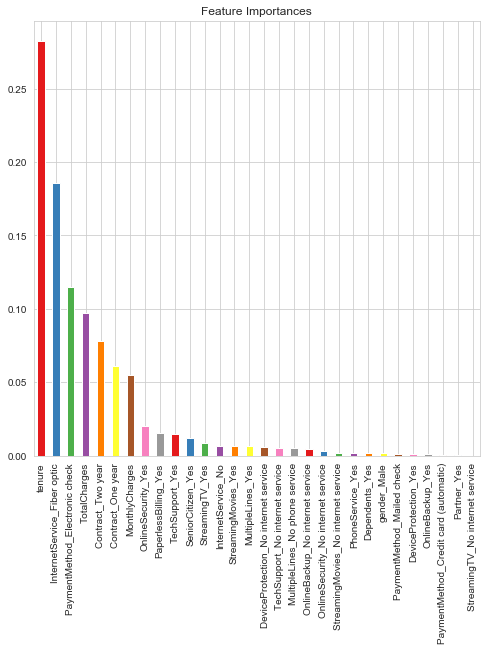

In [403]:
gradient_feature.plot(kind='bar',title = "Feature Importances", width = 0.5,figsize = (8,8),color=sns.color_palette("Set1"))

By looking at feature importance plot above, we can see that tenure, internetservice_fiber optic, TotalCharges, Contract, and MonthlyCharge are the features that affecting the Churn. From here we can made some interpretation that customers who already contracted for a long period of time would be tend to churned. The same thing also happen to customers with high monthly charge. Moreover, customers who subscribed with fiber optics service and high total charge also like to churned.